In [65]:
import os
import cv2
import numpy as np

In [66]:
# define a function to read  and reconstruct the YUV file and return the list of frames
# def read_yuv(filename, width, height):
#     #open the file
#     f = open(filename, 'rb')
#     #read the file
#     data = f.read()
#     #close the file
#     f.close()
#     #get the number of frames
#     nframes = len(data) // (width * height * 3 // 2)
#     #create a list to store the frames
#     frames = []
#     #loop through the frames
#     for i in range(nframes):
#         #get the Y component
#         Y = np.frombuffer(data, dtype=np.uint8, count=width * height, offset=i * width * height * 3 // 2)
#         #get the U component
#         U = np.frombuffer(data, dtype=np.uint8, count=width * height // 4, offset=i * width * height * 3 // 2 + width * height)
#         #get the V component
#         V = np.frombuffer(data, dtype=np.uint8, count=width * height // 4, offset=i * width * height * 3 // 2 + width * height * 5 // 4)
#         #reshape the Y component
#         Y = Y.reshape((height, width))
#         #reshape the U component
#         U = U.reshape((height // 2, width // 2))
#         #reshape the V component
#         V = V.reshape((height // 2, width // 2))
#         #create a list to store the YUV components
#         yuv = [Y, U, V]
#         #append the list to the frames list
#         frames.append(yuv)
#     #return the list of frames
#     return frames


In [130]:
def read_YUV(filename, size):

    height, width = size
    frame_len = width * height * 3 // 2
    shape = (int(height * 1.5), width)

    frames = []
    with open(filename, "rb") as file:
        while True:
            try:
                raw = file.read(frame_len)
                yuv = np.frombuffer(raw, dtype=np.uint8)
                yuv = yuv.reshape(shape)

                img = cv2.cvtColor(yuv, cv2.COLOR_YUV2BGR_I420, 3)
                frames.append(img)
            except:
                break

    return frames


In [131]:
#assign the path "./input/bs1_25fps.yuv" to the variable filename
filename = "./input/bs1_25fps.yuv"



In [132]:
#store the literals 768 and 432 in the variables width and height respectively
width = 768
height = 432

In [133]:
#read the YUV file and store the frames in the list frames
frames = read_YUV(filename, (height, width))

#print the number of frames
print(len(frames))


217


In [134]:
#store the frames in the directory "./input/frames" and create if not exists
os.makedirs("./input/frames", exist_ok=True)
#assign the path to the variable path
path = "./input/frames"

#loop through the frames and save in the path directory with the name {index}.jpg index with 3 digits starting from 1
for index, frame in enumerate(frames):
    cv2.imwrite(f"{path}/{index+1:03d}.jpg", frame)


    








In [72]:
#funtion which read the images from the path and creates a H.264 video with the specified bitrate
#with one I frame and rest P frames and save it in the directory "./input/video" and create the directory if not exists
def create_video(path, bitrate):
    #create a list to store the images
    frames = []
    #create the directory if not exists 
    os.makedirs("./input/video", exist_ok=True)
    #create the path with bitrate
    target_file_name = os.path.join("./input/video", f"video_{bitrate}.mp4")
    
    #loop through the images in the path directory
    for image in os.listdir(path):
        #read the image
        frame = cv2.imread(os.path.join(path, image))
        #append the frame to the frames list
        frames.append(frame)
    #create a VideoWriter object with the specified bitrate
    
    video = cv2.VideoWriter(target_file_name, cv2.VideoWriter_fourcc(*"H264"), 25, (width, height), True)
    #write the first frame as I frame
    video.write(frames[0])
    #loop through the rest of the frames and write them as P frames
    for frame in frames[1:]:
        video.write(frame)
    #release the VideoWriter object
    video.release()
    
    
    

In [73]:
#funtion which read the images from the path and creates a H.264 video with the specified bitrate
#with one I frame and rest P frames and save it in the directory "./input/video" 

In [74]:
#call the function with the path and bitrate 100
create_video(path, 1000)

In [75]:
path

'./input/frames'

In [76]:
 #create a list to store the frames
frames = []
#loop through the images in the path directory
for image in os.listdir(path):
    #read the image
    frame = cv2.imread(os.path.join(path, image))
    #append the frame to the frames list
    frames.append(frame)
#create a VideoWriter object with the specified bitrate
video = cv2.VideoWriter("./input/check.mp4", cv2.VideoWriter_fourcc(*"H264"), 25, (width, height), True)
#write the first frame as I frame
video.write(frames[0])
#loop through the rest of the frames and write them as P frames
for frame in frames[1:]:
    video.write(frame)
#release the VideoWriter object
video.release()
    

In [77]:
total_frames = len(os.listdir(path))
BITRATE_START = 100
BITRATE_END = 1001
BITRATE_STEP = 100


In [78]:
def create_h264(in_path, out_path):
    for bitrate in range(BITRATE_START, BITRATE_END, BITRATE_STEP):
            os.system(
            f"ffmpeg -hide_banner -loglevel panic -i {in_path}/%03d.jpg -b:v {bitrate}k -c:v libx264 "
            f"-x264-params keyint=300:min-keyint=300:no-scenecut=1:bframes=0 -c:a copy -y "
            f"{out_path}/{bitrate}.h264"
        )


        # Check the frame types and print stats for the compressed file
            frame_details = os.popen(
            f"ffprobe -hide_banner -loglevel panic -show_frames "
            f"{out_path}/{bitrate}.h264 | Findstr pict_type"
        )

            I_frame_count = 0
            P_Frame_count = 0
            for line in frame_details:
                type = line.rstrip().split("=")[-1]

                if type == "I":
                    I_frame_count += 1
                else:
                    P_Frame_count += 1

            print(f"I Frame Count: {I_frame_count}, P Frame Count: {P_Frame_count}, Total Frames: {total_frames}")


#create a temp_path 
in_path = "./input/frames"
out_path = "./output/h264_format_compressed"            
create_h264(in_path,out_path)

I Frame Count: 1, P Frame Count: 216, Total Frames: 217
I Frame Count: 1, P Frame Count: 216, Total Frames: 217
I Frame Count: 1, P Frame Count: 216, Total Frames: 217
I Frame Count: 1, P Frame Count: 216, Total Frames: 217
I Frame Count: 1, P Frame Count: 216, Total Frames: 217
I Frame Count: 1, P Frame Count: 216, Total Frames: 217
I Frame Count: 1, P Frame Count: 216, Total Frames: 217
I Frame Count: 1, P Frame Count: 216, Total Frames: 217
I Frame Count: 1, P Frame Count: 216, Total Frames: 217
I Frame Count: 1, P Frame Count: 216, Total Frames: 217


In [79]:
#create the path_compressed for the compressed files
path_compressed = "./output/h264_format_compressed"

Decompress the frames from the H264 format

In [80]:
#decompress the compressed file
#loop through the bitrates
for bitrate in range(BITRATE_START, BITRATE_END, BITRATE_STEP):
    #create the path for the decompressed files and create the directory if not exists
    os.makedirs("./output/h264_format_decompressed", exist_ok=True)
    #make the directories for each bitrate if not exists
    os.makedirs(os.path.join("./output/h264_format_decompressed", str(bitrate)), exist_ok=True)
    #make the directory for each bitrate in compressed path
    # os.makedirs(os.path.join(path_compressed, str(bitrate)), exist_ok=True)
    #create the path for the decompressed files
    path_decompressed = os.path.join("./output/h264_format_decompressed", str(bitrate))
    #ffmpeg command to decompress the file
    os.system(
            f"ffmpeg -hide_banner -loglevel panic -i "
            f"{path_compressed}/{bitrate}.h264"
            f" -qscale:v 2 {path_decompressed}/%03d.jpg"
        )


Now calculate the MSE between the original frames and the extracted frames from various birates in Y channel

In [81]:
#save the original_path as the path for the original frames
original_path = path
#loop through the bitrates  

In [82]:
#function to calculate the MSE between the original and the decompressed frames
def calculate_MSE(original_path, decompressed_path):
    #create a list to store the original frames
    original_frames = []
    #create a list to store the decompressed frames
    decompressed_frames = []
    #loop through the original frames
    for image in os.listdir(original_path):
        #read the image
        frame = cv2.imread(os.path.join(original_path, image))
        #append the frame to the original_frames list
        original_frames.append(frame)
    #loop through the decompressed frames
    for image in os.listdir(decompressed_path):
        #read the image
        frame = cv2.imread(os.path.join(decompressed_path, image))
        #append the frame to the decompressed_frames list
        decompressed_frames.append(frame)
    #create a list to store the MSE values
    MSE_values = []
    #loop through the original and decompressed frames
    for original_frame, decompressed_frame in zip(original_frames, decompressed_frames):
        #change the format from bgr to yuv
        original_frame = cv2.cvtColor(original_frame, cv2.COLOR_BGR2YUV)
        decompressed_frame = cv2.cvtColor(decompressed_frame, cv2.COLOR_BGR2YUV)

        #extract the Luma component
        original_frame = original_frame[:, :, 0]
        decompressed_frame = decompressed_frame[:, :, 0]

        #calculate the MSE
        MSE = np.mean((original_frame - decompressed_frame) ** 2)
        #append the MSE to the MSE_values list
        MSE_values.append(MSE)
    #return the MSE_values list
    #add the MSE values of all the frames and divide by the total number of frames if not zero
    return sum(MSE_values) / len(MSE_values) if len(MSE_values) != 0 else 0



In [83]:
#loop through the bitrates
for bitrate in range(BITRATE_START, BITRATE_END, BITRATE_STEP):
    #create the path for the decompressed files
    decompressed_path = os.path.join("./output/h264_format_decompressed", str(bitrate))
    #call the function to calculate the MSE
    MSE = calculate_MSE(original_path, decompressed_path)
    #print the MSE
    print(f"MSE for {bitrate} is {MSE}")
    

MSE for 100 is 62.52330803338083
MSE for 200 is 42.75999469521604
MSE for 300 is 37.186870418040094
MSE for 400 is 33.934411691237116
MSE for 500 is 31.498020623319896
MSE for 600 is 29.637217920835816
MSE for 700 is 28.179706084522742
MSE for 800 is 26.93792136030039
MSE for 900 is 25.873641954751754
MSE for 1000 is 24.936948284134626


Graph for plotting MSE vs Bitrate

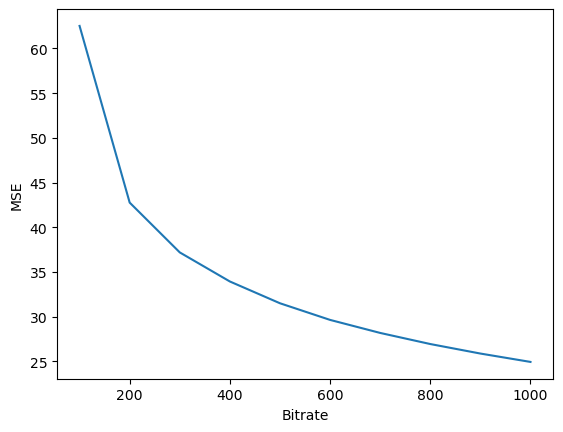

In [84]:
import matplotlib.pyplot as plt


#plot the graph for the MSE 
#list to store the bitrates
bitrates = []
#list to store the MSE values
MSE_values = []
#loop through the bitrates
for bitrate in range(BITRATE_START, BITRATE_END, BITRATE_STEP):
    #create the path for the decompressed files
    decompressed_path = os.path.join("./output/h264_format_decompressed", str(bitrate))
    #call the function to calculate the MSE
    MSE = calculate_MSE(original_path, decompressed_path)
    #append the bitrates and MSE values to the lists
    bitrates.append(bitrate)
    MSE_values.append(MSE)
#plot the graph
plt.plot(bitrates, MSE_values)
plt.xlabel("Bitrate")
plt.ylabel("MSE")
plt.show()



Downsampling the file and then compressing

In [86]:
#print the length of frames
print(len(frames))

217


In [87]:
#downsample the frames to downsampled_frames
downsampled_frames = []
#loop through the frames
for frame in frames:
    #downsample the frame
    downsampled_frame = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)
    #append the downsampled frame to the downsampled_frames list
    downsampled_frames.append(downsampled_frame)


In [88]:
#save the downsampled_frames to the path_downsampled
path_downsampled = "./input/downsampled/"
#create the directory if not exists
os.makedirs(path_downsampled, exist_ok=True)
#save the downsampled frames to the path_downsampled
for i, frame in enumerate(downsampled_frames):
    cv2.imwrite(os.path.join(path_downsampled, f"{i:03}.jpg"), frame)


In [89]:
#count the total frames in the directory
total_frames = len(os.listdir(path_downsampled))
total_frames


217

Doing the same operation as done with the original. ffmpeg to create H.264 format and save it

In [90]:
in_path = path_downsampled
out_path = "./output/h264_format_downsampled"
#create the directory if not exists
os.makedirs(out_path, exist_ok=True)
create_h264(in_path, out_path)

I Frame Count: 1, P Frame Count: 216, Total Frames: 217
I Frame Count: 1, P Frame Count: 216, Total Frames: 217
I Frame Count: 1, P Frame Count: 216, Total Frames: 217
I Frame Count: 1, P Frame Count: 216, Total Frames: 217
I Frame Count: 1, P Frame Count: 216, Total Frames: 217
I Frame Count: 1, P Frame Count: 216, Total Frames: 217
I Frame Count: 1, P Frame Count: 216, Total Frames: 217
I Frame Count: 1, P Frame Count: 216, Total Frames: 217
I Frame Count: 1, P Frame Count: 216, Total Frames: 217
I Frame Count: 1, P Frame Count: 216, Total Frames: 217


In [91]:
path_compressed

'./output/h264_format_compressed'

Decompressing the frames from the H264 format

In [92]:
path_compressed = "./output/h264_format_downsampled"
for bitrate in range(BITRATE_START, BITRATE_END, BITRATE_STEP):
    #create the path for the decompressed files and create the directory if not exists
    os.makedirs("./output/h264_format_downsample_decompressed", exist_ok=True)
    #make the directories for each bitrate if not exists
    os.makedirs(os.path.join("./output/h264_format_downsample_decompressed", str(bitrate)), exist_ok=True)
    #make the directory for each bitrate in compressed path
    # os.makedirs(os.path.join(path_compressed, str(bitrate)), exist_ok=True)
    #create the path for the decompressed files
    path_decompressed = os.path.join("./output/h264_format_downsample_decompressed", str(bitrate))
    #ffmpeg command to decompress the file
    os.system(
            f"ffmpeg -hide_banner -loglevel panic -i "
            f"{path_compressed}/{bitrate}.h264"
            f" -qscale:v 2 {path_decompressed}/%03d.jpg"
        )

UPSAMPLE THE EXTRACTED FRAMES

In [93]:
def load_frames(path):

    #load the jpg images in the directory path
    
    frames = []
    for image in os.listdir(path):
        #read the image
        frame = cv2.imread(os.path.join(path, image))   
        #append the frame to the frames list
        frames.append(frame)
    #return the frames list
    return frames


In [94]:
#loop through the bitrates
for bitrate in range(BITRATE_START, BITRATE_END, BITRATE_STEP):
    #load the frames from the directory
    frames = load_frames(os.path.join("./output/h264_format_downsample_decompressed", str(bitrate)))
    #upsample the frames to upsampled_frames
    upsampled_frames = []
    #loop through the frames
    for frame in frames:
        #upsample the frame
        upsampled_frame = cv2.resize(frame, (0, 0), fx=2, fy=2)
        #append the upsampled frame to the upsampled_frames list
        upsampled_frames.append(upsampled_frame)
    #save the upsampled_frames to the path_upsampled with bitrate
    path_upsampled = os.path.join("./output/h264_format_downsample_decompressed_upsampled", str(bitrate))
    #create the directory if not exists
    os.makedirs(path_upsampled, exist_ok=True)
    #save the upsampled frames to the path_upsampled
    for i, frame in enumerate(upsampled_frames):
        cv2.imwrite(os.path.join(path_upsampled, f"{i:03}.jpg"), frame)
        
    
    

Calculating the MSE for the downsampled frames

In [95]:
#calculate the MSE for the upsampled frames against the original frames
#loop through the bitrates
for bitrate in range(BITRATE_START, BITRATE_END, BITRATE_STEP):
    #create the path for the decompressed files
    decompressed_path = os.path.join("./output/h264_format_downsample_decompressed_upsampled", str(bitrate))
    #call the function to calculate the MSE
    MSE = calculate_MSE(original_path, decompressed_path)
    #print the MSE
    print(f"MSE for {bitrate} is {MSE}")
    

MSE for 100 is 51.35468154684122
MSE for 200 is 46.43549787186381
MSE for 300 is 44.32733786629012
MSE for 400 is 43.034394673481344
MSE for 500 is 42.14398735407956
MSE for 600 is 41.48370641554394
MSE for 700 is 40.96446596193265
MSE for 800 is 40.50186170248229
MSE for 900 is 40.16751947124616
MSE for 1000 is 39.85917541778232


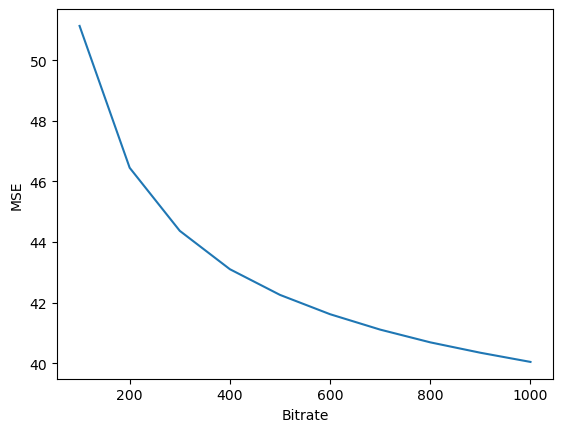

In [47]:
#plot the graph for the MSE
#list to store the bitrates
bitrates = []
#list to store the MSE values
MSE_values = []
#loop through the bitrates
for bitrate in range(BITRATE_START, BITRATE_END, BITRATE_STEP):
    #create the path for the decompressed files
    decompressed_path = os.path.join("./output/h264_format_downsample_decompressed_upsampled", str(bitrate))
    #call the function to calculate the MSE
    MSE = calculate_MSE(original_path, decompressed_path)
    #append the bitrates and MSE values to the lists
    bitrates.append(bitrate)
    MSE_values.append(MSE)
#plot the graph
plt.plot(bitrates, MSE_values)
plt.xlabel("Bitrate")
plt.ylabel("MSE")
plt.show()


In [101]:
#calculate the PSNR for the upsampled frames against the original frames
#loop through the bitrates

#assigning the paths
path_frames_original = ".\input\frames"
path_frames_first_case = ".output\h264_format_decompressed"
path_frames_second_case_without_upsampling = ".output\h264_format_downsample_decompressed"
path_frames_second_case_with_upsampling = ".output\h264_format_downsample_decompressed_upsampled"


for bitrate in range(BITRATE_START, BITRATE_END, BITRATE_STEP):

    os.system(
        f"FFREPORT=file={path_frames_first_case}/{bitrate}/{bitrate}_psnr.csv:level=32 ffmpeg -hide_banner -loglevel panic "
        f"-i {path_frames_original}/%03d.jpg"
        f" -i {path_frames_first_case}/{bitrate}/%03d.jpg "
        f"-filter_complex psnr -f null -")

    os.system(
        f"FFREPORT=file={path_frames_first_case}/{bitrate}/{bitrate}_vmaf.log:level=32 ffmpeg -hide_banner -loglevel panic "
        f"-i {path_frames_original}/%03d.jpg"
        f"-i {path_frames_first_case}/{bitrate}/%03d.jpg "
        f"-filter_complex libvmaf -f null -")

    os.system(
        f"FFREPORT=file={path_frames_second_case_with_upsampling}/{bitrate}/{bitrate}_psnr.log:level=32 ffmpeg -hide_banner -loglevel panic "
        f"-i {path_frames_original}/%03d.jpg"
        f" -i {path_frames_second_case_with_upsampling}/{bitrate}/%03d.jpg "
        f"-filter_complex psnr -f null -")

    os.system(
        f"FFREPORT=file={path_frames_second_case_with_upsampling}/{bitrate}/{bitrate}_vmaf.log:level=32 ffmpeg -hide_banner -loglevel panic "
        f"-i {path_frames_original}/%03d.jpg"
        f"-i {path_frames_second_case_with_upsampling}/{bitrate}/%03d.jpg "
        f"-filter_complex libvmaf -f null -")
    

In [142]:
#calculate the PSNR for the upsampled frames against the original frames
#loop through the bitrates

#assigning the paths
path_frames_original = "./input/frames"
path_frames_first_case = ".output/h264_format_decompressed"
path_frames_second_case_without_upsampling = ".output/h264_format_downsample_decompressed"
path_frames_second_case_with_upsampling = ".output/h264_format_downsample_decompressed_upsampled"


for bitrate in range(BITRATE_START, BITRATE_END, BITRATE_STEP):

    # os.system(
    #     f"FFREPORT=file={path_frames_first_case}/{bitrate}/{bitrate}_psnr.log:level=32 ffmpeg -hide_banner -loglevel panic "
    #     f"-i {path_frames_original}/%03d.jpg"
    #     f" -i {path_frames_first_case}/{bitrate}/%03d.jpg "
    #     f"-filter_complex psnr -f null -")

    os.system(
        f"ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg"
        f"-i D:/study_sem_3/Video-Compression-and-PCA-master/output/h264_format_decompressed/{bitrate}/%03d.jpg" 
        f"-lavfi psnr=stats_file={bitrate}_psnr.log -f null -")
    
    # os.system(
    #     f"FFREPORT=file={path_frames_first_case}/{bitrate}/{bitrate}_vmaf.log:level=32 ffmpeg -hide_banner -loglevel panic "
    #     f"-i {path_frames_original}/%03d.jpg"
    #     f"-i {path_frames_first_case}/{bitrate}/%03d.jpg "
    #     f"-filter_complex libvmaf -f null -")
    
    os.system(
            f"ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg"
            f"-i D:/study_sem_3/Video-Compression-and-PCA-master/output/h264_format_decompressed/{bitrate}/%03d.jpg" 
            f"-lavfi libvmaf=\"model_path='C:/PATH_programs/ffmpeg-5.1.2-full_build-shared/bin/vmaf_v0.6.1.json'\":"
            f"log_path= D:/study_sem_3/Video-Compression-and-PCA-master/output/h264_format_decompressed/{bitrate}/{bitrate}_vmaf.log -f null -")
    
        
    # os.system(
    #     f"FFREPORT=file={path_frames_second_case_with_upsampling}/{bitrate}/{bitrate}_psnr.log:level=32 ffmpeg -hide_banner -loglevel panic "
    #     f"-i {path_frames_original}/%03d.jpg"
    #     f" -i {path_frames_second_case_with_upsampling}/{bitrate}/%03d.jpg "
    #     f"-filter_complex psnr -f null -")

    os.system(
        f"ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg"
        f"-i D:/study_sem_3/Video-Compression-and-PCA-master/output/h264_format_downsample_decompressed_upsampled/{bitrate}/%03d.jpg" 
        f"-lavfi psnr=stats_file=D:/study_sem_3/Video-Compression-and-PCA-master/output/h264_format_downsample_decompressed_upsampled/{bitrate}/{bitrate}_psnr.log -f null -")
    
    
    # os.system(
    #     f"FFREPORT=file={path_frames_second_case_with_upsampling}/{bitrate}/{bitrate}_vmaf.log:level=32 ffmpeg -hide_banner -loglevel panic "
    #     f"-i {path_frames_original}/%03d.jpg"
    #     f"-i {path_frames_second_case_with_upsampling}/{bitrate}/%03d.jpg "
    #     f"-filter_complex libvmaf -f null -")
    
    os.system(
        f"ffmeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg"
        f"-i D:/study_sem_3/Video-Compression-and-PCA-master/output/h264_format_downsample_decompressed_upsampled/{bitrate}/%03d.jpg"   
        f"-lavfi libvmaf=\"model_path='C:/PATH_programs/ffmpeg-5.1.2-full_build-shared/bin/vmaf_v0.6.1.json'\":"
        f"log_path= D:/study_sem_3/Video-Compression-and-PCA-master/output/h264_format_downsample_decompressed_upsampled/{bitrate}/{bitrate}_vmaf.log -f null -")
    
    

In [109]:
path_frames_original
path_frames_original = "./input/frames"
path_frames_original = "./input/frames"
path_frames_first_case = ".output/h264_format_decompressed"
path_frames_second_case_without_upsampling = ".output/h264_format_downsample_decompressed"
path_frames_second_case_with_upsampling = ".output/h264_format_downsample_decompressed_upsampled"

In [135]:
#load the image from the path path_frames_original
img = cv2.imread(path_frames_original + "/001.jpg")
#print the shape of the image
print(img.shape)

(432, 768, 3)


In [128]:
#load the image from the path path_frames_first_case
img = cv2.imread("D:/study_sem_3/Video-Compression-and-PCA-master/output/h264_format_decompressed/100" + "/001.jpg")
#print the shape of the image

In [129]:
img = cv2.imread("D:/study_sem_3/Video-Compression-and-PCA-master/output/h264_format_decompressed/100" + "/001.jpg")
#print the shape of the image
print(img.shape)


(432, 768, 3)


In [121]:
path_frames_first_case + "/100/001.jpg"

'.output/h264_format_decompressed/100/001.jpg'

In [145]:
a = (
        f"ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg "
        f"-i D:/study_sem_3/Video-Compression-and-PCA-master/output/h264_format_decompressed/100/%03d.jpg " 
        f"-lavfi psnr=stats_file=100_psnr.csv -f null -")
b = (
        f"ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg "
        f"-i D:/study_sem_3/Video-Compression-and-PCA-master/output/h264_format_decompressed/200/%03d.jpg "
        f"-lavfi psnr=stats_file=200_psnr.csv -f null -")
c = (
        f"ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg "
        f"-i D:/study_sem_3/Video-Compression-and-PCA-master/output/h264_format_decompressed/300/%03d.jpg "
        f"-lavfi psnr=stats_file=300_psnr.csv -f null -")
d = (
        f"ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg "
        f"-i D:/study_sem_3/Video-Compression-and-PCA-master/output/h264_format_decompressed/400/%03d.jpg "
        f"-lavfi psnr=stats_file=400_psnr.csv -f null -")
e = (
        f"ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg "
        f"-i D:/study_sem_3/Video-Compression-and-PCA-master/output/h264_format_decompressed/500/%03d.jpg "
        f"-lavfi psnr=stats_file=500_psnr.csv -f null -")



In [207]:

#loop over the bitrates
for bitrate in bitrates:
    i = 1
    cmd = (
        f"ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg "
        f"-i D:/study_sem_3/Video-Compression-and-PCA-master/output/h264_format_decompressed/{bitrate}/%03d.jpg "
        f"-lavfi psnr=stats_file={bitrate}_psnr.log -f null -")
    os.system(cmd)





In [208]:
#loop over the bitrates
for bitrate in bitrates:
    i = 1
    cmd = (
        f"ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg "
        f"-i D:/study_sem_3/Video-Compression-and-PCA-master/output/h264_format_downsample_decompressed_upsampled/{bitrate}/%03d.jpg "
        f"-lavfi psnr=stats_file={bitrate}_psnr_upsampled.log -f null -")
    os.system(cmd)

In [ ]:
#loop over the bitrates
for bitrate in bitrates:
    i = 1
    cmd = (
        f"ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg "
        f"-i D:/study_sem_3/Video-Compression-and-PCA-master/output/h264_format_downsample_decompressed_upsampled/{bitrate}/%03d.jpg "
        f"-lavfi psnr=stats_file={bitrate}_psnr_upsampled.csv -f null -")
    os.system(cmd)

In [160]:
bitrate = 100
a =   (
            f"ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg "
            f"-i D:/study_sem_3/Video-Compression-and-PCA-master/output/h264_format_decompressed/{bitrate}/%03d.jpg " 
            f"-lavfi libvmaf=\"model_path='C:/PATH_programs/ffmpeg-5.1.2-full_build-shared/bin/vmaf_v0.6.1.json'\":"
            f"log_path={bitrate}_vmaf.log -f null -")

a


'ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg -i D:/study_sem_3/Video-Compression-and-PCA-master/output/h264_format_decompressed/100/%03d.jpg -lavfi libvmaf="model_path=\'C:/PATH_programs/ffmpeg-5.1.2-full_build-shared/bin/vmaf_v0.6.1.json\'":log_path=100_vmaf.log -f null -'

In [198]:
#loop over the bitrates
for bitrate in bitrates:
    cmd = (
            f"ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg "
            f"-i D:/study_sem_3/Video-Compression-and-PCA-master/output/h264_format_decompressed/{bitrate}/%03d.jpg " 
            f"-lavfi libvmaf=\"model_path=\\'C:/PATH_programs/ffmpeg-5.1.2-full_build-shared/bin/vmaf_v0.6.1.json\\'\":"
            f"log_path={bitrate}_vmaf.log -f null -")
    print(cmd)
    os.system(cmd)


ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg -i D:/study_sem_3/Video-Compression-and-PCA-master/output/h264_format_decompressed/100/%03d.jpg -lavfi libvmaf="model_path=\'C:/PATH_programs/ffmpeg-5.1.2-full_build-shared/bin/vmaf_v0.6.1.json\'":log_path=100_vmaf.log -f null -
ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg -i D:/study_sem_3/Video-Compression-and-PCA-master/output/h264_format_decompressed/200/%03d.jpg -lavfi libvmaf="model_path=\'C:/PATH_programs/ffmpeg-5.1.2-full_build-shared/bin/vmaf_v0.6.1.json\'":log_path=200_vmaf.log -f null -
ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg -i D:/study_sem_3/Video-Compression-and-PCA-master/output/h264_format_decompressed/300/%03d.jpg -lavfi libvmaf="model_path=\'C:/PATH_programs/ffmpeg-5.1.2-full_build-shared/bin/vmaf_v0.6.1.json\'":log_path=300_vmaf.log -f null -
ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master

In [170]:
#loop over the bitrates
for bitrate in bitrates:
    cmd = (
            f"ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg "
            f"-i D:/study_sem_3/Video-Compression-and-PCA-master/output/h264_format_downsample_decompressed_upsampled/{bitrate}/%03d.jpg " 
            f"-lavfi libvmaf=\"model_path=\\'C:/PATH_programs/ffmpeg-5.1.2-full_build-shared/bin/vmaf_v0.6.1.json\\'\":"
            f"log_path={bitrate}_vmaf_upsampled.log -f null -")
    print(cmd)
    os.system(cmd)

ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg -i D:/study_sem_3/Video-Compression-and-PCA-master/output/h264_format_downsample_decompressed_upsampled/100/%03d.jpg -lavfi libvmaf="model_path=\'C:/PATH_programs/ffmpeg-5.1.2-full_build-shared/bin/vmaf_v0.6.1.json\'":log_path=100_vmaf_upsampled.log -f null -
ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg -i D:/study_sem_3/Video-Compression-and-PCA-master/output/h264_format_downsample_decompressed_upsampled/200/%03d.jpg -lavfi libvmaf="model_path=\'C:/PATH_programs/ffmpeg-5.1.2-full_build-shared/bin/vmaf_v0.6.1.json\'":log_path=200_vmaf_upsampled.log -f null -
ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg -i D:/study_sem_3/Video-Compression-and-PCA-master/output/h264_format_downsample_decompressed_upsampled/300/%03d.jpg -lavfi libvmaf="model_path=\'C:/PATH_programs/ffmpeg-5.1.2-full_build-shared/bin/vmaf_v0.6.1.json\'":log_path=3

In [174]:
#open the file and read the contents
with open('100_vmaf.csv', 'r') as file :
    filedata = file.read()
    #search vmaf in each row and extract the next value
    vmaf = [float(row.split('vmaf')[1]) for row in filedata.split(' ')]
    #print the vmaf
    print(vmaf)

IndexError: list index out of range

In [176]:
#read the file and extract the vmaf
with open('100_vmaf_upsampled.log', 'r') as file :
    filedata = file.read()
    #search vmaf 
    vmaf = [float(row.split('vmaf')[1]) for row in filedata.split(' ')]
    #print the vmaf
    print(vmaf)

IndexError: list index out of range

In [179]:
val_vmaf = float(
        list(os.popen(f"cat ./100_vmaf_upsampled.log | Findstr vmaf"))[-1].strip().split(
            " ")[-3].split(":")[-1])


IndexError: list index out of range

In [252]:
def extract_vmaf(bitrate, upsampled=False):
    # bitrate = 100
    if upsampled:
        temp_path = f"{bitrate}_vmaf_upsampled.log"
    else:
        temp_path = f"{bitrate}_vmaf.log"
#read the file
    print(temp_path)
    vmaf = []
    with open(temp_path, 'r') as file :
    #delete the first 4 lines
        for i in range(4):
            next(file)
    
    #read the next 217 lines
        for i in range(217):
        #using the delimiter = ' ' split the line into a list
            vmaf.append(float(next(file).split(' ')[17].split('"')[1]))
        #print the vmaf

#convert the list to a numpy array
    vmaf = np.array(vmaf)
    print(vmaf)
    return vmaf

       

In [236]:
with open('100_vmaf.log ', 'r') as file :
    #delete the first 4 lines
        for i in range(4):
            next(file)
    
    #read the next 217 lines
        for i in range(217):
        #using the delimiter = ' ' split the line into a list
            # vmaf.append(float(next(file).split(' ')[17].split('"')[1]))
            a = next(file).split(' ')[17]
            # a = a.split('"')[1]
            b = a.split('"')[1]
            print(b)
        #print the vmaf


44.686533
50.266201
48.856576
50.574552
51.695238
50.342105
50.134866
50.182257
50.388238
51.541360
49.345575
51.405107
46.216220
49.366510
44.475345
47.263255
45.540621
48.679665
48.127663
44.752728
44.266563
45.861192
44.360112
44.884094
42.946962
43.921905
44.778596
42.794803
43.803905
45.052413
43.729517
41.830310
43.877236
45.944860
45.685992
45.745400
42.779758
44.528452
43.996687
46.122766
44.004857
46.315085
44.283152
45.370815
45.979885
47.285014
45.684348
45.881397
45.518565
44.489419
45.022554
44.545658
44.456179
44.075483
43.469061
46.327648
43.230445
45.739779
44.933663
44.818860
44.238364
44.961742
46.262607
45.734815
45.052754
45.348697
43.697752
46.789804
46.997187
47.061803
45.756296
45.057795
46.401347
46.584916
45.000539
45.454158
46.697799
47.127589
45.440346
46.848809
47.775495
46.941450
46.514534
47.609278
46.036042
48.006535
47.319881
47.984312
46.717285
47.097648
47.668113
47.139533
48.296316
48.247874
47.711066
48.224867
48.863705
48.139404
49.124202
47.310167


In [253]:
#loop over the bitrates
vmaf_values = []
#loop over the bitrates
for bitrate in bitrates:
    vmaf_values.append(extract_vmaf(bitrate))
    print(bitrate)

vmaf_values[3]
#convert the list to a numpy array
# vmaf_values = np.array(vmaf_values)
# vmaf_values.shape
# vmaf_values[9][0]
# vmaf

100_vmaf.log
[44.686533 50.266201 48.856576 50.574552 51.695238 50.342105 50.134866
 50.182257 50.388238 51.54136  49.345575 51.405107 46.21622  49.36651
 44.475345 47.263255 45.540621 48.679665 48.127663 44.752728 44.266563
 45.861192 44.360112 44.884094 42.946962 43.921905 44.778596 42.794803
 43.803905 45.052413 43.729517 41.83031  43.877236 45.94486  45.685992
 45.7454   42.779758 44.528452 43.996687 46.122766 44.004857 46.315085
 44.283152 45.370815 45.979885 47.285014 45.684348 45.881397 45.518565
 44.489419 45.022554 44.545658 44.456179 44.075483 43.469061 46.327648
 43.230445 45.739779 44.933663 44.81886  44.238364 44.961742 46.262607
 45.734815 45.052754 45.348697 43.697752 46.789804 46.997187 47.061803
 45.756296 45.057795 46.401347 46.584916 45.000539 45.454158 46.697799
 47.127589 45.440346 46.848809 47.775495 46.94145  46.514534 47.609278
 46.036042 48.006535 47.319881 47.984312 46.717285 47.097648 47.668113
 47.139533 48.296316 48.247874 47.711066 48.224867 48.863705 48.1

array([83.610137, 90.313922, 89.636328, 89.635923, 89.607214, 89.852381,
       89.144646, 89.742167, 90.137064, 90.254633, 88.361847, 89.233787,
       84.619813, 81.897817, 81.106885, 80.815423, 81.499954, 81.389875,
       82.967448, 82.708985, 84.290499, 84.977762, 86.610662, 87.43653 ,
       89.113989, 89.817436, 90.618231, 91.94828 , 92.825974, 93.031546,
       93.194338, 93.617099, 93.405184, 94.247095, 94.434913, 94.357753,
       94.152824, 93.909312, 93.595523, 93.453376, 93.808164, 93.983718,
       93.353419, 93.226748, 92.205745, 93.409085, 93.327835, 92.971323,
       93.046693, 92.537521, 92.556522, 92.368853, 92.765235, 92.652565,
       93.405067, 92.760251, 93.140152, 93.233949, 93.407527, 93.332003,
       93.510729, 93.573452, 93.432028, 93.970739, 93.376982, 93.139659,
       93.102001, 93.24473 , 93.846743, 93.832577, 93.41846 , 93.046661,
       93.274808, 93.843862, 93.412354, 93.746397, 93.919632, 94.966679,
       93.93073 , 93.716758, 94.307392, 94.197811, 

In [270]:
vmaf_values_upsampled = []
#loop over the bitrates
for bitrate in bitrates:
    vmaf_values_upsampled.append(extract_vmaf(bitrate, upsampled=True))
    print(bitrate)

#convert the list to a numpy array
vmaf_values_upsampled = np.array(vmaf_values_upsampled)
vmaf_values_upsampled.shape

100_vmaf_upsampled.log
[46.955516 51.243551 50.05433  50.5702   50.136154 50.705575 50.267117
 46.077053 49.731463 48.498776 48.436466 47.767085 46.87199  47.546286
 48.475453 49.945854 48.121734 49.73057  49.589417 51.373192 53.226203
 55.619077 55.311519 57.806104 58.186863 57.813735 58.462438 59.122129
 60.575502 59.993081 61.042965 60.445033 63.729364 62.459147 62.654899
 61.197349 62.71765  64.13091  65.419541 65.870726 64.384646 64.206204
 66.86696  66.604615 64.931586 66.941017 65.771313 65.615387 65.397128
 64.531953 64.350685 63.914669 64.023797 63.415342 65.109505 65.54189
 65.311684 63.620725 64.703674 66.146792 65.891411 67.484203 66.029918
 67.157605 69.029698 66.533627 66.357351 65.43415  66.792277 65.892096
 65.966814 65.435104 66.411167 66.493386 65.39614  65.055506 65.701537
 65.588591 66.467037 67.458475 66.0638   66.056256 67.375247 66.106477
 64.660663 66.606673 66.715987 66.509777 65.985092 66.190776 66.263185
 65.277376 65.428978 66.902521 64.421566 65.315277 65.3

(10, 217)

In [256]:
vmaf_values[2][0]

78.57448

In [263]:
def extract_psnr(bitrate, upsampled=False):
    psnr = []
    # bitrate = 100
    if upsampled:
        temp_path = f"{bitrate}_psnr_upsampled.log"
    else:
        temp_path = f"{bitrate}_psnr.log"

    with open(temp_path, 'r') as file :
    #read the next 217 lines
            for i in range(217):
        #using the delimiter = ' ' split the line into a list
                psnr.append(float(next(file).split(' ')[6].split(':')[1]))
            # print(next(file).split(' ')[0])
            
        #print the vmaf
            
#convert the list to a numpy array
    psnr = np.array(psnr)
    return psnr


In [268]:
#loop over the bitrates
psnr_values = []
#loop over the bitrates
for bitrate in bitrates:
    psnr_values.append(extract_psnr(bitrate))
    # print(bitrate)

# psnr_values[0][1]
#convert the list to a numpy array
psnr_values = np.array(psnr_values)
psnr_values.shape


(10, 217)

In [269]:
psnr_values_upsampled = []
#loop over the bitrates
for bitrate in bitrates:
    psnr_values_upsampled.append(extract_psnr(bitrate, upsampled=True))
    
#convert the list to a numpy array
psnr_values_upsampled = np.array(psnr_values_upsampled)
psnr_values_upsampled.shape

(10, 217)

In [279]:
#create a plot function taking two arguments
def plot_vmaf_psnr(first,second,PSNR=True):
    #create a figure
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    #plot the vmaf
    ax[0].plot(bitrates, first, label="COMPRESS WITHOUT DOWN-SAMPLING")
    #plot the psnr
    ax[1].plot(bitrates, second, label="COMPRESS WITH DOWNSAMPLING AND UPSAMPLING")
    #set the x axis label
    ax[0].set_xlabel("Bitrate")
    ax[1].set_xlabel("Bitrate")
    #set the y axis label
    if PSNR:
        ax[0].set_ylabel("PSNR")
        ax[1].set_ylabel("PSNR")
    else:
        ax[0].set_ylabel("VMAF")
        ax[1].set_ylabel("VMAF")
    #set the title
    ax[0].set_title("COMPRESS WITHOUT DOWN-SAMPLING")
    ax[1].set_title("COMPRESS WITH DOWNSAMPLING AND UPSAMPLING")
    # #set the legend
    # ax[0].legend()
    # ax[1].legend()
    #show the plot
    plt.show()

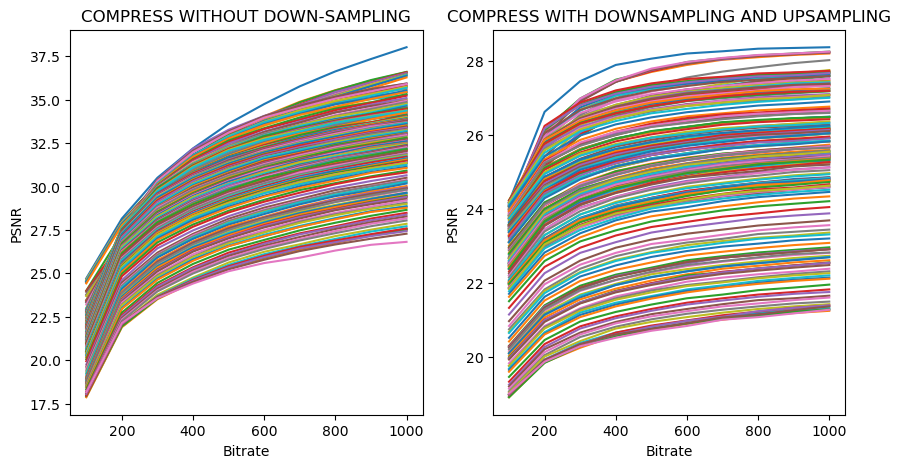

In [278]:
plot_vmaf_psnr(psnr_values, psnr_values_upsampled)

IN THE ABOVE FIGURE PSNR VALUES AT DIFFERENT BITRATES AND OF DIFFERENT FRAMES(217) ARE SHOWN WITH DIFFERENT LEGENDS

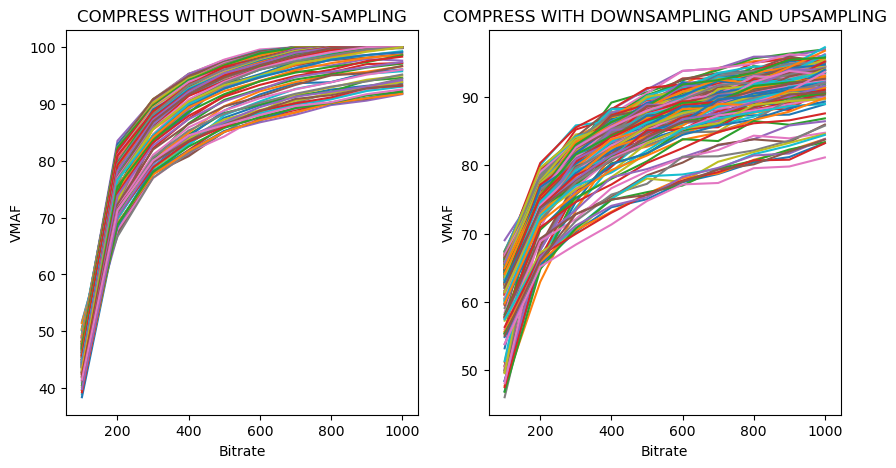

In [280]:
plot_vmaf_psnr(vmaf_values, vmaf_values_upsampled, PSNR=False)

IN THE ABOVE FIGURE VMAF VALUES AT DIFFERENT BITRATES AND OF DIFFERENT FRAMES(217) ARE SHOWN WITH DIFFERENT LEGENDS

In [283]:
#create a plot function taking two arguments and a title
def plot_vmaf_psnr_mean(first,second,title,PSNR=True):
    #plot two lines in the same plot
    #take the mean of the vmaf values
    plt.plot(bitrates, np.mean(first, axis=1), label="COMPRESS WITHOUT DOWN-SAMPLING")
    plt.plot(bitrates, np.mean(second, axis=1), label="COMPRESS WITH DOWNSAMPLING AND UPSAMPLING")
    # plt.plot(bitrates, first, label="COMPRESS WITHOUT DOWN-SAMPLING")
    # plt.plot(bitrates, second, label="COMPRESS WITH DOWNSAMPLING AND UPSAMPLING")
    #set the x axis label
    plt.xlabel("Bitrate")
    #set the y axis label
    if PSNR:
        plt.ylabel("PSNR")
    else:
        plt.ylabel("VMAF")
    #set the title
    plt.title(title)
    #set the legend
    plt.legend()
    #show the plot
    plt.show()

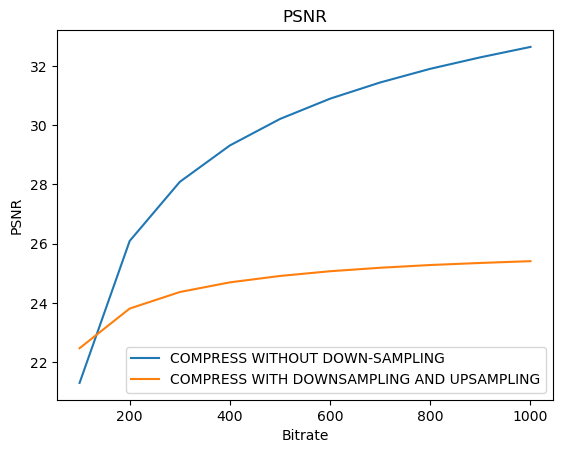

In [284]:
plot_vmaf_psnr_mean(psnr_values, psnr_values_upsampled, "PSNR")

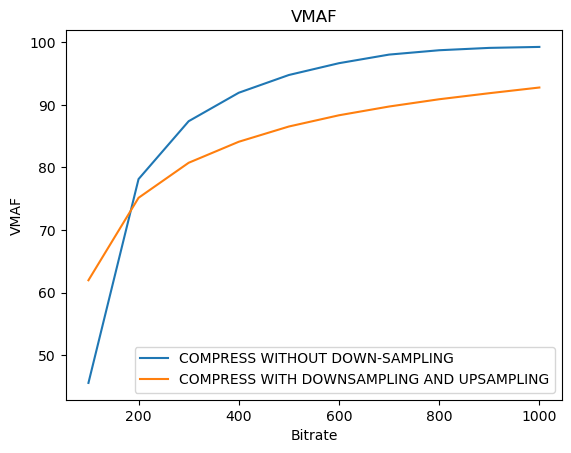

In [285]:
plot_vmaf_psnr_mean(vmaf_values, vmaf_values_upsampled, "VMAF", PSNR=False)